In [6]:
import os
import sys
sys.path.insert(0, '/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset')
sys.path.insert(0, '/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/lib')
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

from analysis.plot_generators.plot_utils import make_performance_line_plot

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#### Global configurations

In [7]:
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# S5.1

#### Figure 5.1.1

In [8]:
train_csv_path = '../plot_csv/section_5/figure_5_1_1_train.csv'
val_csv_path = '../plot_csv/section_5/figure_5_1_1_val.csv'

train_df = pd.read_csv(train_csv_path)
train_df = train_df.set_axis(['class', 'train: pixel-wise', 'train: occurence'], axis = 1)
val_df = pd.read_csv(val_csv_path)
val_df = val_df.set_axis(['class', 'val: pixel-wise', 'val: occurence'], axis = 1)

figure_df = train_df.merge(val_df)

Text(0, 0.5, '')

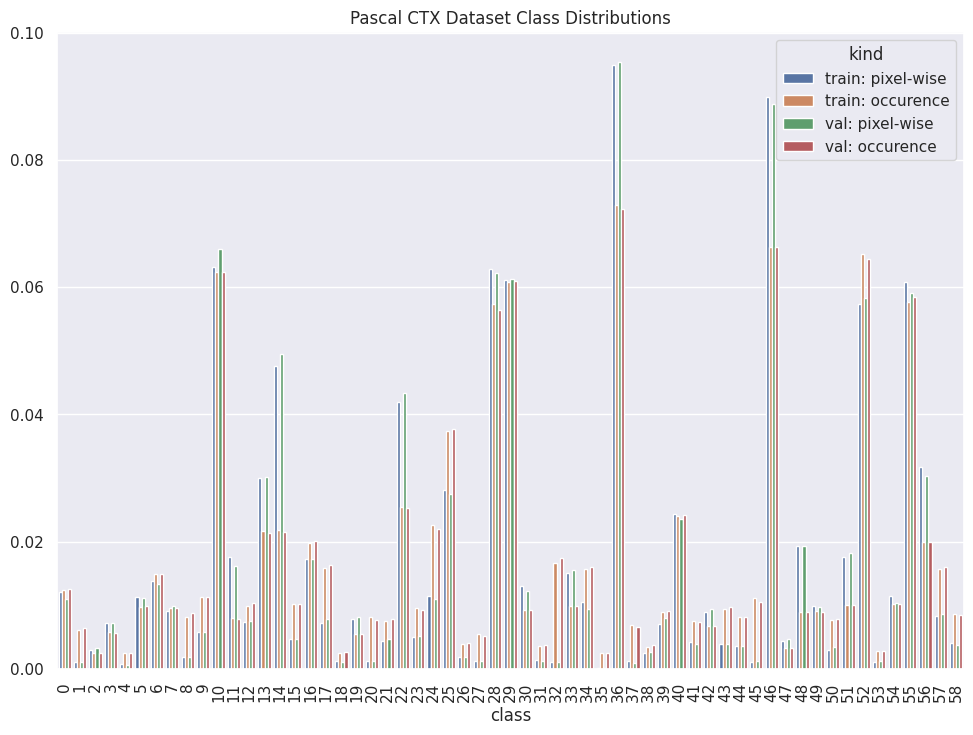

In [9]:
plot_df = figure_df.melt(id_vars=['class'], var_name='kind', value_name='proportion')
plt = sns.barplot(data=plot_df, x='class', y='proportion', hue='kind')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Pascal CTX Dataset Class Distributions')
plt.set_ylabel('')

#### Figure 5.1.2

In [10]:
train_csv_path = '../plot_csv/section_5/figure_5_1_2_train.csv'
val_csv_path = '../plot_csv/section_5/figure_5_1_2_val.csv'

train_df = pd.read_csv(train_csv_path)
train_df = train_df.set_axis(['class', 'train: pixel-wise', 'train: occurence'], axis = 1)
val_df = pd.read_csv(val_csv_path)
val_df = val_df.set_axis(['class', 'val: pixel-wise', 'val: occurence'], axis = 1)

figure_df = train_df.merge(val_df)

Text(0, 0.5, '')

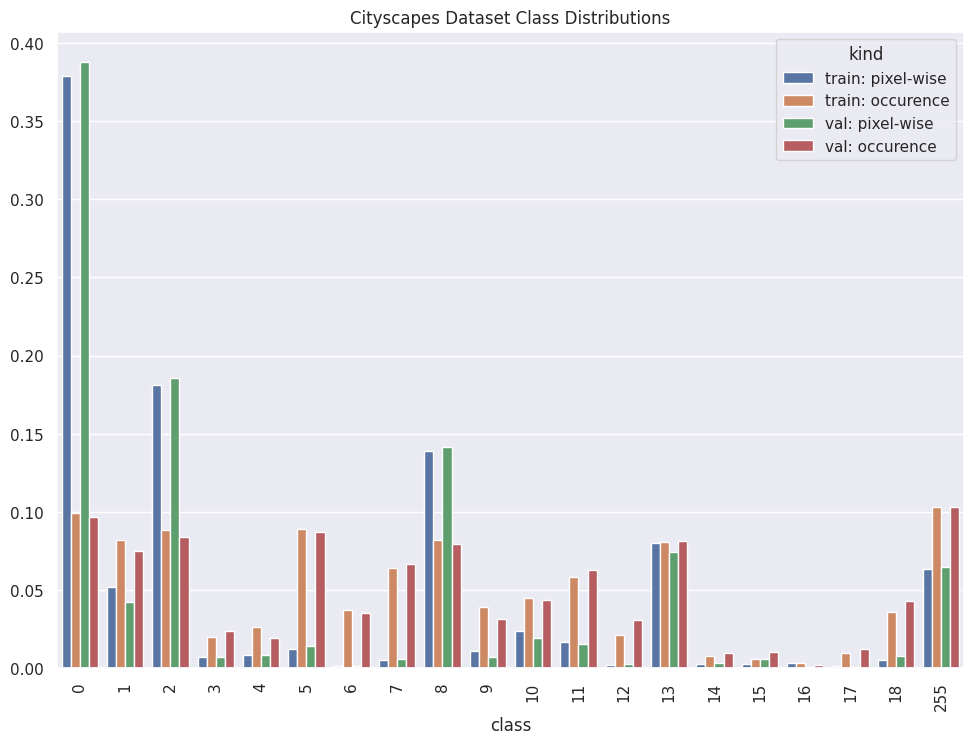

In [11]:
plot_df = figure_df.melt(id_vars=['class'], var_name='kind', value_name='proportion')
plt = sns.barplot(data=plot_df, x='class', y='proportion', hue='kind')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Cityscapes Dataset Class Distributions')
plt.set_ylabel('')

#### Figure 5.1.4

In [12]:
train_csv_path = '../plot_csv/section_5/figure_5_1_4_train.csv'
val_csv_path = '../plot_csv/section_5/figure_5_1_4_val.csv'

train_df = pd.read_csv(train_csv_path)
train_df = train_df.set_axis(['class', 'train'], axis = 1)
val_df = pd.read_csv(val_csv_path)
val_df = val_df.set_axis(['class', 'val'], axis = 1)

figure_df = train_df.merge(val_df)

Text(0, 0.5, '')

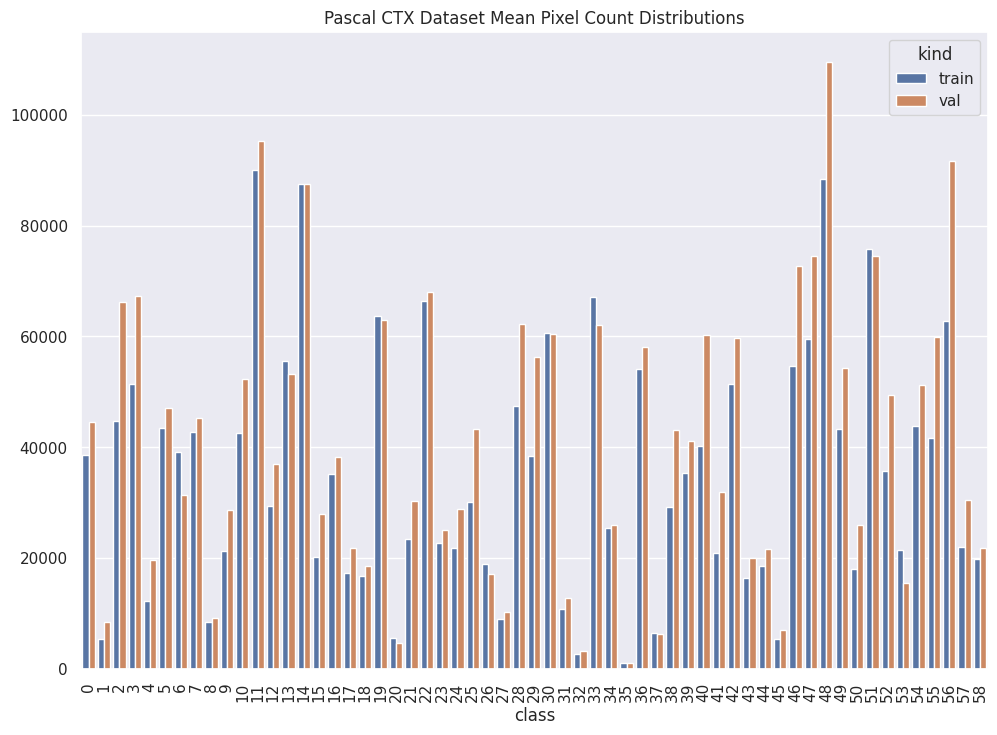

In [13]:
plot_df = figure_df.melt(id_vars=['class'], var_name='kind', value_name='proportion')
plt = sns.barplot(data=plot_df, x='class', y='proportion', hue='kind')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Pascal CTX Dataset Mean Pixel Count Distributions')
plt.set_ylabel('')

#### Figure 5.1.5

In [14]:
train_csv_path = '../plot_csv/section_5/figure_5_1_5_train.csv'
val_csv_path = '../plot_csv/section_5/figure_5_1_5_val.csv'

train_df = pd.read_csv(train_csv_path)
train_df = train_df.set_axis(['class', 'train'], axis = 1)
val_df = pd.read_csv(val_csv_path)
val_df = val_df.set_axis(['class', 'val'], axis = 1)

figure_df = train_df.merge(val_df)

Text(0, 0.5, '')

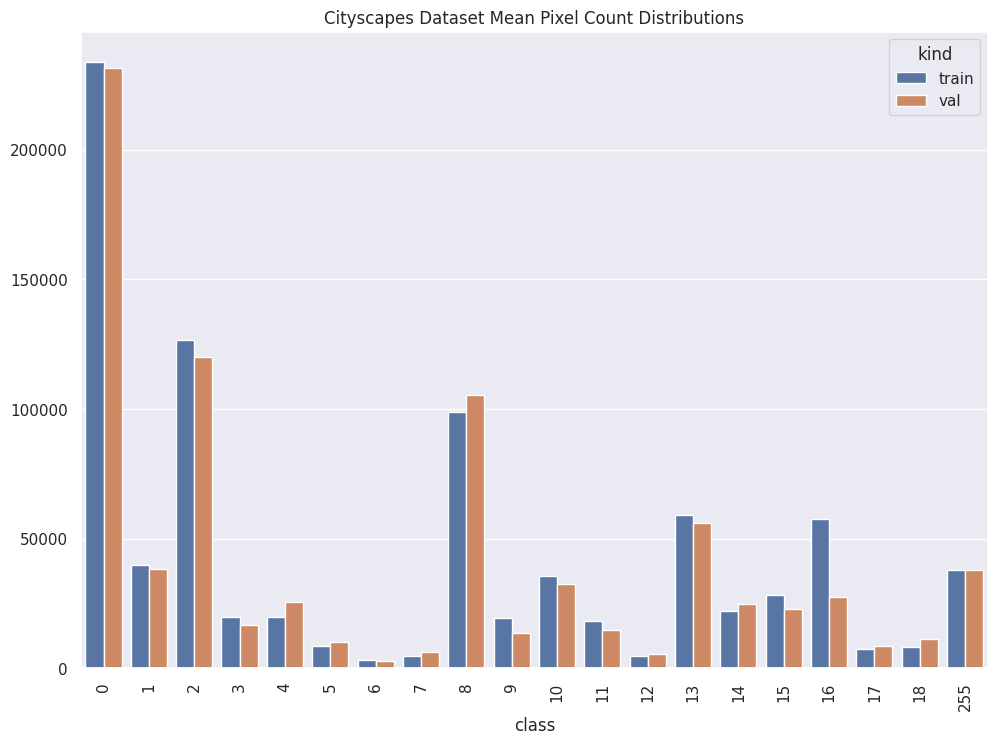

In [15]:
plot_df = figure_df.melt(id_vars=['class'], var_name='kind', value_name='proportion')
plt = sns.barplot(data=plot_df, x='class', y='proportion', hue='kind')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Cityscapes Dataset Mean Pixel Count Distributions')
plt.set_ylabel('')

#### Figure 5.1.7

In [16]:
csv_path = '../plot_csv/section_5/figure_5_1_7_train.csv'
figure_df = pd.read_csv(csv_path)
clean_df = figure_df.drop(labels=['-1', '0'], axis='columns')
clean_df = clean_df.drop(labels=0, axis='index')
clean_df = clean_df.set_axis(range(59), axis=0)
clean_df = clean_df.set_axis(range(59), axis=1)

Text(0.5, 1.0, 'Pascal CTX Class Co-occurence')

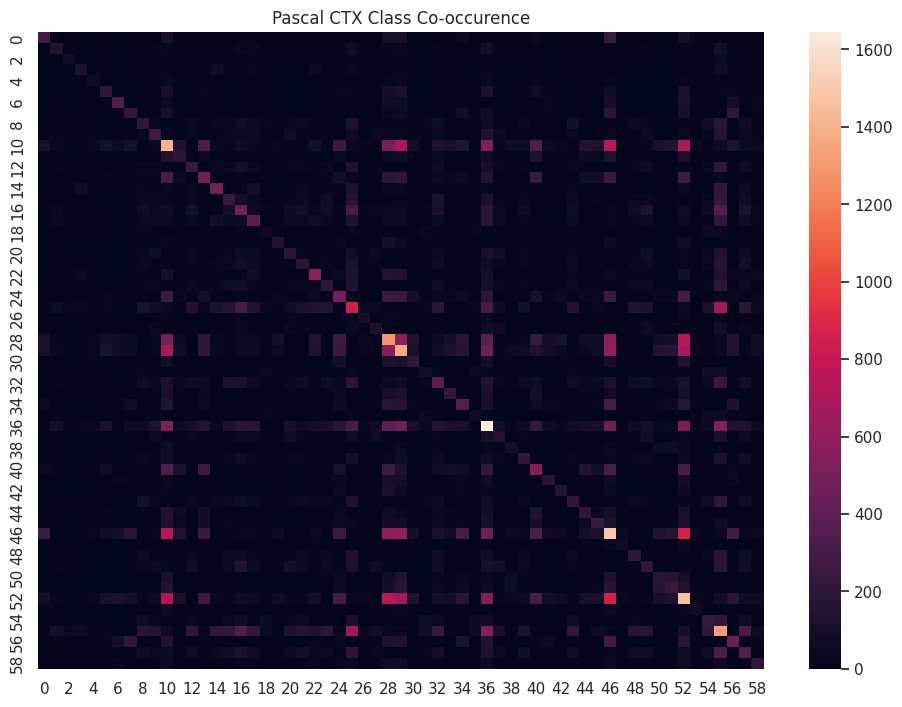

In [17]:
heat_map = sns.heatmap(clean_df)
heat_map.set_title('Pascal CTX Class Co-occurence')

#### Figure 5.1.8

In [18]:
csv_path = '../plot_csv/section_5/figure_5_1_8_train.csv'
figure_df = pd.read_csv(csv_path)
clean_df = figure_df.drop(labels=['0'], axis='columns')
clean_df = clean_df.rename(columns={'0.1':'0'})
clean_df = clean_df.set_axis(clean_df.columns, axis=0)

Text(0.5, 1.0, 'Cityscapes Class Co-occurence')

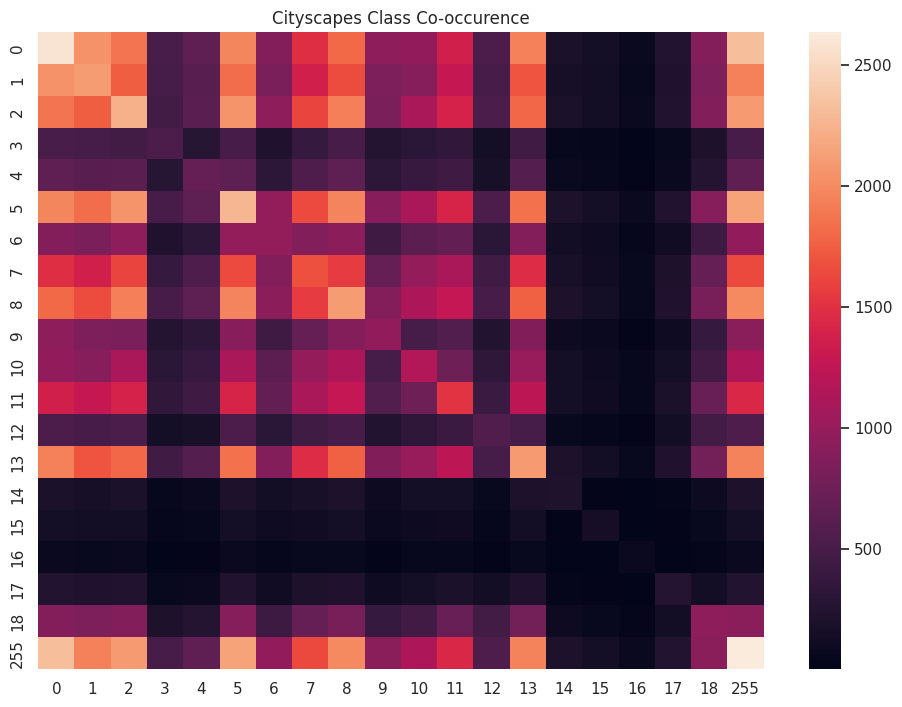

In [19]:
heat_map = sns.heatmap(clean_df)
heat_map.set_title('Cityscapes Class Co-occurence')

# S5.2

#### Figure 5.2.1

In [20]:
csv_path = '../plot_csv/section_5/figure_5_2_1.csv'
figure_df = pd.read_csv(csv_path)

Text(0.5, 1.0, 'Pascal CTX Random Baselines')

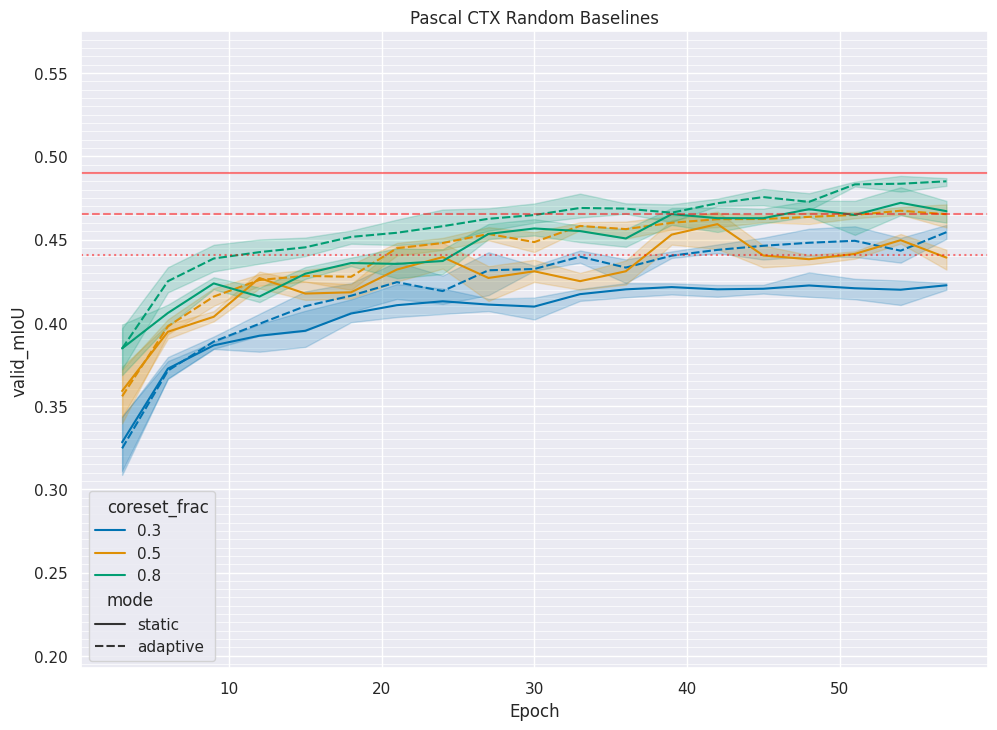

In [21]:
SCALARS = ["valid_mIoU", "valid_loss", "train_loss"]
full_model_performance_dict = dict(zip(SCALARS, [0.49, 0.8753, 0.1515]))
scalar = 'valid_mIoU'

hue = figure_df["mode"].astype(str) + ", " + figure_df["coreset_frac"].astype(str)

line_plt = sns.lineplot(data=figure_df, x="step_num", y="val", hue='coreset_frac', style='mode', palette='colorblind')  # .set_title("valid_mIoU")
line_plt.set_ylim(np.min(line_plt.get_yticks()) * 0.7, np.max(line_plt.get_yticks()) * 1.15)
line_plt.get_yaxis().set_minor_locator(ticker.AutoMinorLocator(n=10))
line_plt.grid(which="major", color="w", linewidth=1.0)
line_plt.grid(which="minor", color="w", linewidth=0.5)
line_plt.axhline(full_model_performance_dict[scalar], alpha=0.5, color="red")
line_plt.axhline(full_model_performance_dict[scalar] * (0.95 if scalar == "valid_mIoU" else 1.05), alpha=0.5, color="red", linestyle="--")
line_plt.axhline(full_model_performance_dict[scalar] * (0.90 if scalar == "valid_mIoU" else 1.10), alpha=0.5, color="red", linestyle=":")

line_plt.set_xlabel("Epoch")
line_plt.set_ylabel(scalar)
line_plt.set_title("Pascal CTX Random Baselines")

# S5.3

#### FIgure 5.3.1

In [22]:
csv_path = '../plot_csv/section_5/figure_5_3_1.csv'
figure_df = pd.read_csv(csv_path)

figure_df.drop(figure_df[figure_df['proportion_ft'] == 0].index, inplace=True)

Text(0, 0.5, 'Training Time Proportion')

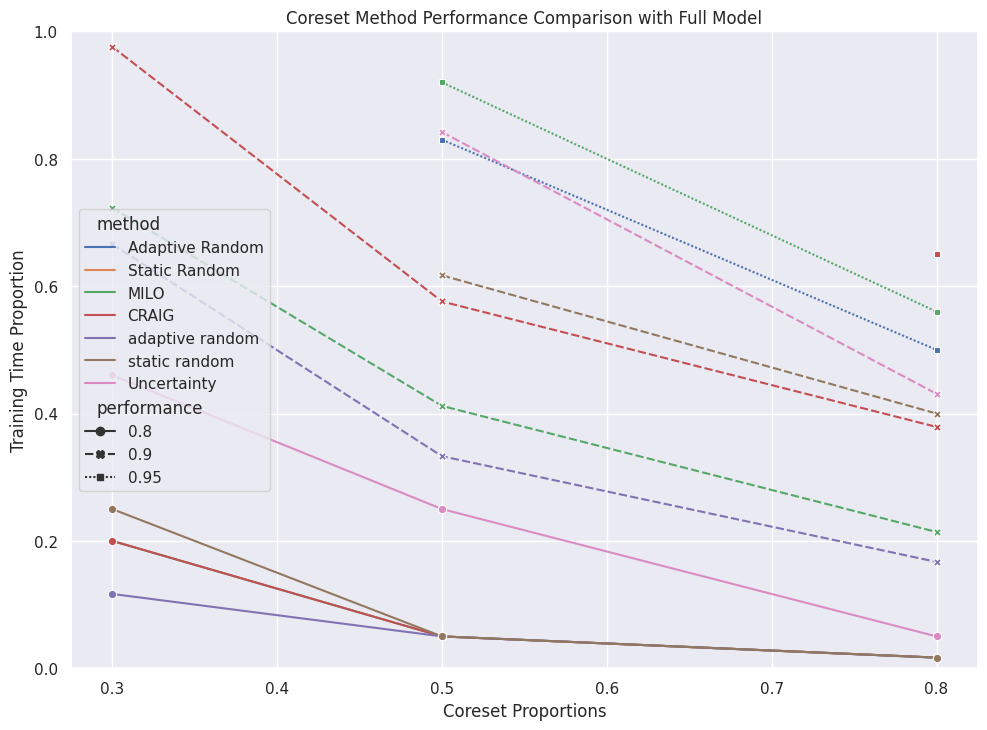

In [23]:
line_plot = sns.lineplot(data=figure_df, x='coreset', y='proportion_ft', hue='method', style='performance', markers=True)
line_plot.set_ylim(0, 1)
line_plot.set_title("Coreset Method Performance Comparison with Full Model")
line_plot.set_xlabel("Coreset Proportions")
line_plot.set_ylabel("Training Time Proportion")

# S5.4

#### Figure 5.4.4.1

In [24]:
csv_path = '../plot_csv/section_5/figure_5_4_4_1.csv'
figure_df = pd.read_csv(csv_path)

In [25]:
mean_val = figure_df[['val', 'epsilon', 'step_num']].groupby(['epsilon', 'step_num'], as_index=False).mean()

# Exponential Smoothing
smoothing_level = 0.3
smoothed_data = {}
for epsilon in mean_val['epsilon'].unique():
    data = mean_val[mean_val['epsilon']==epsilon]
    model = SimpleExpSmoothing(np.asarray(data['val']))
    fit = model.fit(smoothing_level=smoothing_level)
    smoothed_data[epsilon] = fit.fittedvalues
smoothed_data['step_num'] = data['step_num'].values
smoothed_df = pd.DataFrame(smoothed_data).melt(id_vars=['step_num'], var_name='epsilon')
smoothed_df.rename(columns = {'value': 'valid_mIoU'}, inplace=True)

/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


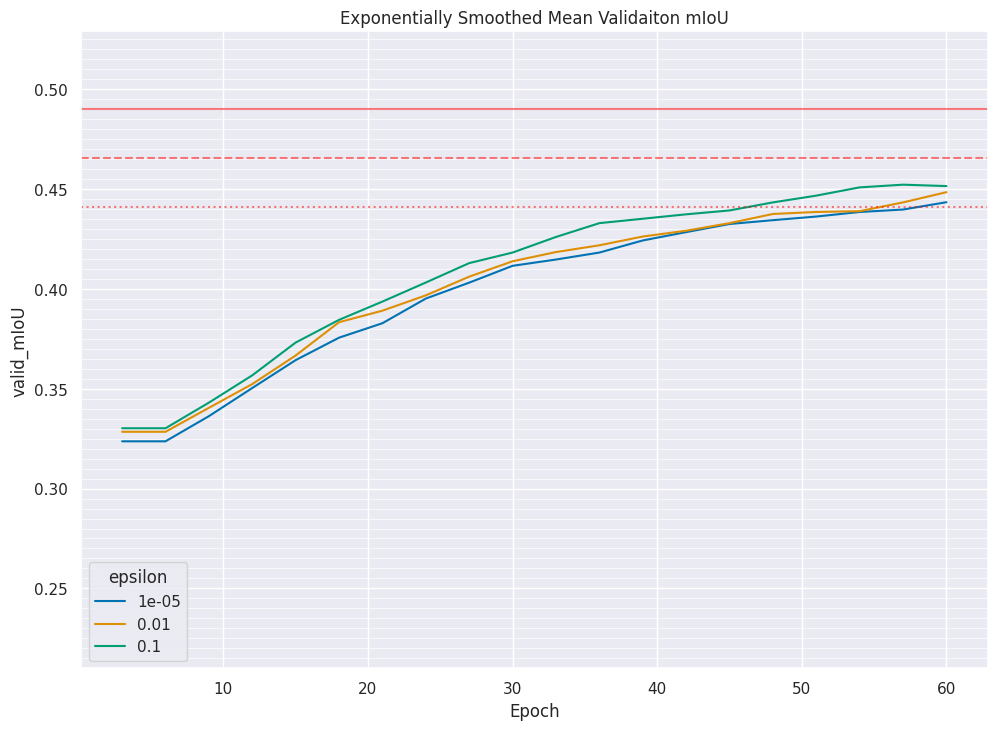

In [30]:
make_performance_line_plot(smoothed_df, 'step_num', 'valid_mIoU', 'epsilon',"Exponentially Smoothed Mean Validaiton mIoU")

#### Figure 5.4.4.2

In [35]:
csv_path = '../plot_csv/section_5/figure_5_4_4_2.csv'
figure_df = pd.read_csv(csv_path)

In [42]:
mean_val = figure_df[['val', 'epsilon', 'step_num']].groupby(['epsilon', 'step_num'], as_index=False).mean()

# Exponential Smoothing
smoothing_level = 0.3
smoothed_data = {}
for epsilon in mean_val['epsilon'].unique():
    data = mean_val[mean_val['epsilon']==epsilon]
    model = SimpleExpSmoothing(np.asarray(data['val']))
    fit = model.fit(smoothing_level=smoothing_level)
    smoothed_data[epsilon] = fit.fittedvalues
smoothed_data['step_num'] = data['step_num'].values
smoothed_df = pd.DataFrame(smoothed_data).melt(id_vars=['step_num'], var_name='epsilon')
smoothed_df.rename(columns = {'value': 'valid_loss'}, inplace=True)

/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


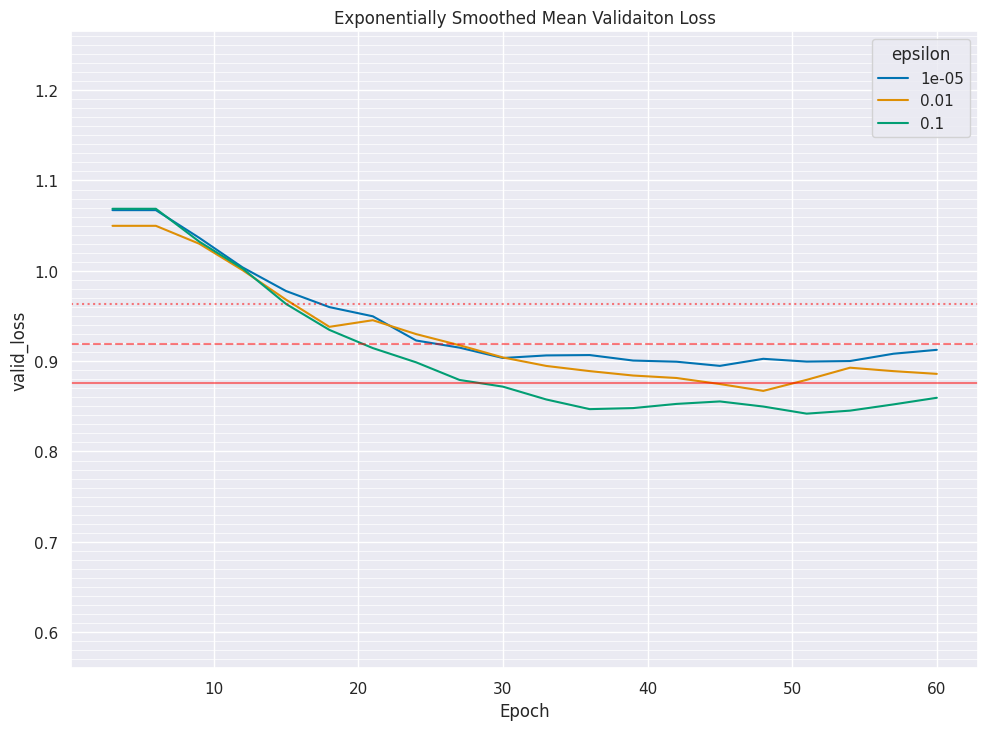

In [43]:
make_performance_line_plot(smoothed_df, 'step_num', 'valid_loss', 'epsilon',"Exponentially Smoothed Mean Validaiton Loss")